# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Trọng Nhân
- MSSV: 22127306
- Lớp: 22CLC08

# Import

In [14]:
import pandas as pd  # Manage and analyze table data
import numpy as np  # Handle numerical data and calculations
import matplotlib.pyplot as plt  # Create visual graphs and plots
import seaborn as sns  # Make statistical charts easier
from tabulate import tabulate  # Display data as formatted tables

# Đọc dữ liệu

In [15]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [16]:
# Cài đặt các hàm cần thiết ở đây
def mean_absolute_error(X_test, y_test, theta):
    """
    Calculate the Mean Absolute Error (MAE) for a linear regression model.

    Parameters:
    - X_test: numpy.ndarray
        Test feature data.
    - y_test: numpy.ndarray
        True target values.
    - theta: numpy.ndarray
        Coefficients of the linear regression model.

    Returns:
    - mae: float
        The mean absolute error between the predicted and true values.
    """
    # Add a column of ones to the test data for the intercept term
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    # Calculate predicted values using the model coefficients
    y_pred = X_test @ theta
    # Calculate the mean absolute error
    mae = np.mean(np.abs(y_pred - y_test))
    return mae

def linear_regression(X, y):
    """
    Perform linear regression using the Normal Equation.

    Parameters:
    - X: numpy.ndarray
        Training feature data.
    - y: numpy.ndarray
        Training target values.

    Returns:
    - theta: numpy.ndarray
        Coefficients of the linear regression model.
    """
    # Add a column of ones to the feature data for the intercept term
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # Transpose of the feature matrix
    X_T = X.T
    try:
        # Calculate regression coefficients using the Normal Equation
        theta = np.linalg.inv(X_T @ X) @ X_T @ y
    except np.linalg.LinAlgError:
        # Use pseudo-inverse if the matrix is not invertible
        theta = np.linalg.pinv(X_T @ X) @ X_T @ y
    return theta

def print_linear_regression_equation(theta, independent_variables, dependent_variable):
    """
    Print the linear regression equation in a human-readable format.

    Parameters:
    - theta: numpy.ndarray
        Coefficients of the linear regression model.
    - independent_variables: list of str
        Names of the independent variables.
    - dependent_variable: str
        Name of the dependent variable.
    """
    # Intercept term is the first element of theta
    intercept = round(theta[0], 3)
    # Remaining elements are the coefficients
    coefficients = [round(coef, 3) for coef in theta[1:]]
    
    # Start building the equation string
    equation = f"{dependent_variable} = {intercept:.3f}"
    for coef, var in zip(coefficients, independent_variables):
        equation += f" + {coef:.3f} * {var}"
        
    print("Linear Regression equation: ", equation)

def k_fold_cross_validation(X, y, k=5):
    """
    Perform k-fold cross-validation for linear regression and return the mean MAE.

    Parameters:
    - X: numpy.ndarray
        Feature data.
    - y: numpy.ndarray
        Target values.
    - k: int
        Number of folds for cross-validation (default is 5).

    Returns:
    - mean_maes: float
        The mean of the mean absolute errors across all folds.
    """
    if not isinstance(X, np.ndarray):
        X = X.values
    if not isinstance(y, np.ndarray):
        y = y.values
    # Determine the size of each fold
    fold_size = X.shape[0] // k
    # Create an array of indices to shuffle the data
    indices = np.arange(X.shape[0])
    # Use a random number generator with a fixed seed for reproducibility
    rng = np.random.default_rng(22127306)
    rng.shuffle(indices)
    maes = []
    
    for fold in range(k):
        # Determine indices for the test set for this fold
        test_indices = indices[fold * fold_size:(fold + 1) * fold_size]
        # Determine indices for the training set by excluding the test indices
        train_indices = np.concatenate([indices[:fold * fold_size], indices[(fold + 1) * fold_size:]])

        # Split the data into training and testing sets
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        # Calculate regression coefficients for the training set
        theta = linear_regression(X_train, y_train)

        # Calculate MAE for the test set
        maes.append(mean_absolute_error(X_test, y_test, theta))
    
    # Calculate the mean of the MAEs from all folds
    mean_maes = np.mean(maes)
    return mean_maes


*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

       Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  Sample Question Papers Practiced  Performance Index
count       9000.000         9000.000                    9000.000     9000.000                          9000.000           9000.000
mean           4.976           69.396                       0.494        6.536                             4.591             55.136
std            2.595           17.370                       0.500        1.696                             2.865             19.188
min            1.000           40.000                       0.000        4.000                             0.000             10.000
25%            3.000           54.000                       0.000        5.000                             2.000             40.000
50%            5.000           69.000                       0.000        7.000                             5.000             55.000
75%            7.000           85.000                       1.000        8.0

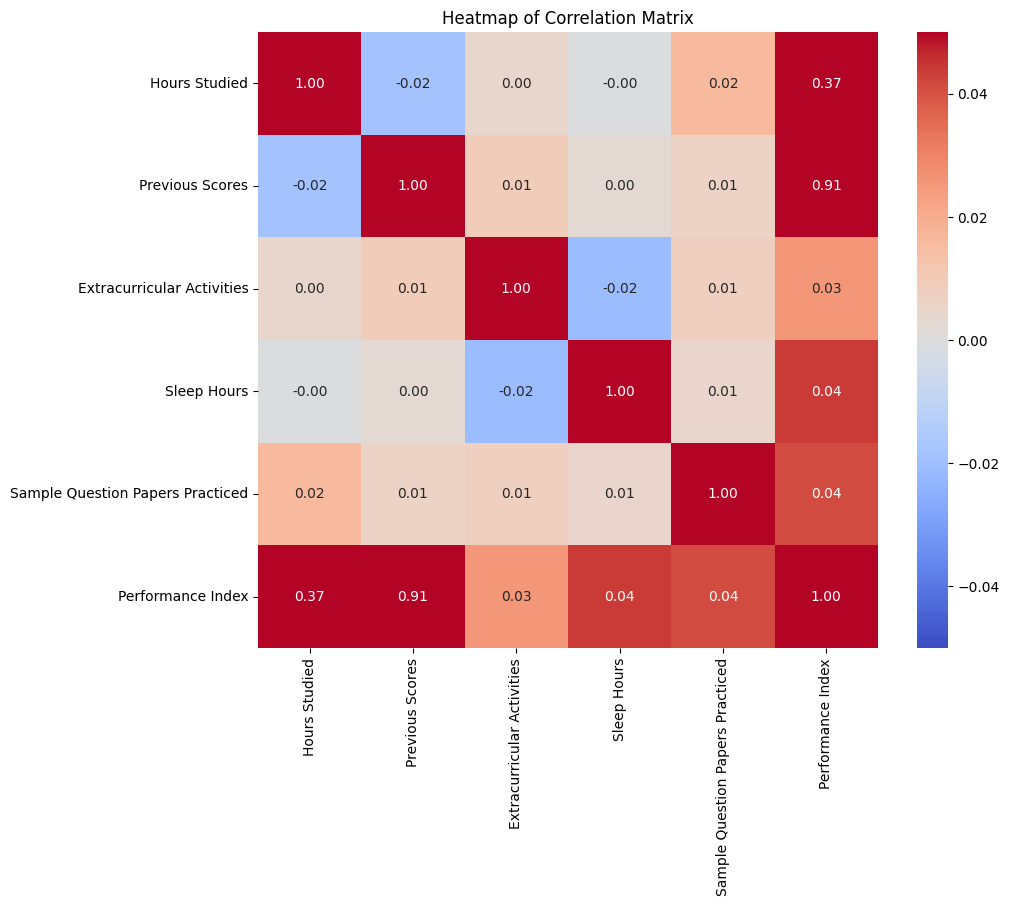

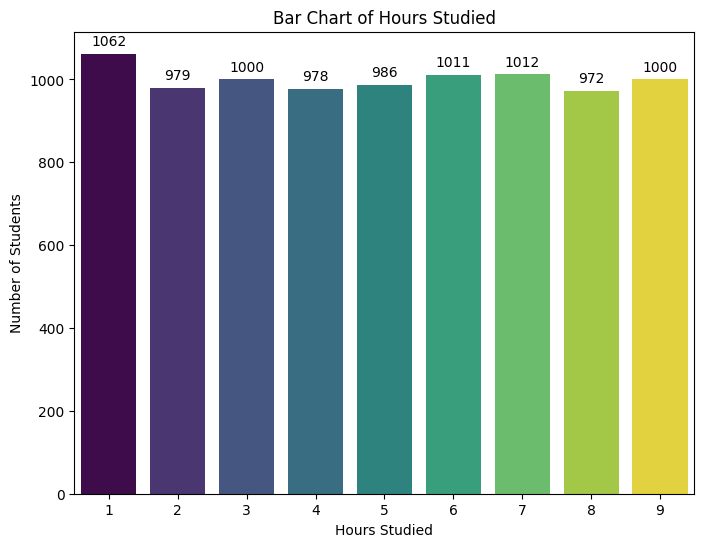

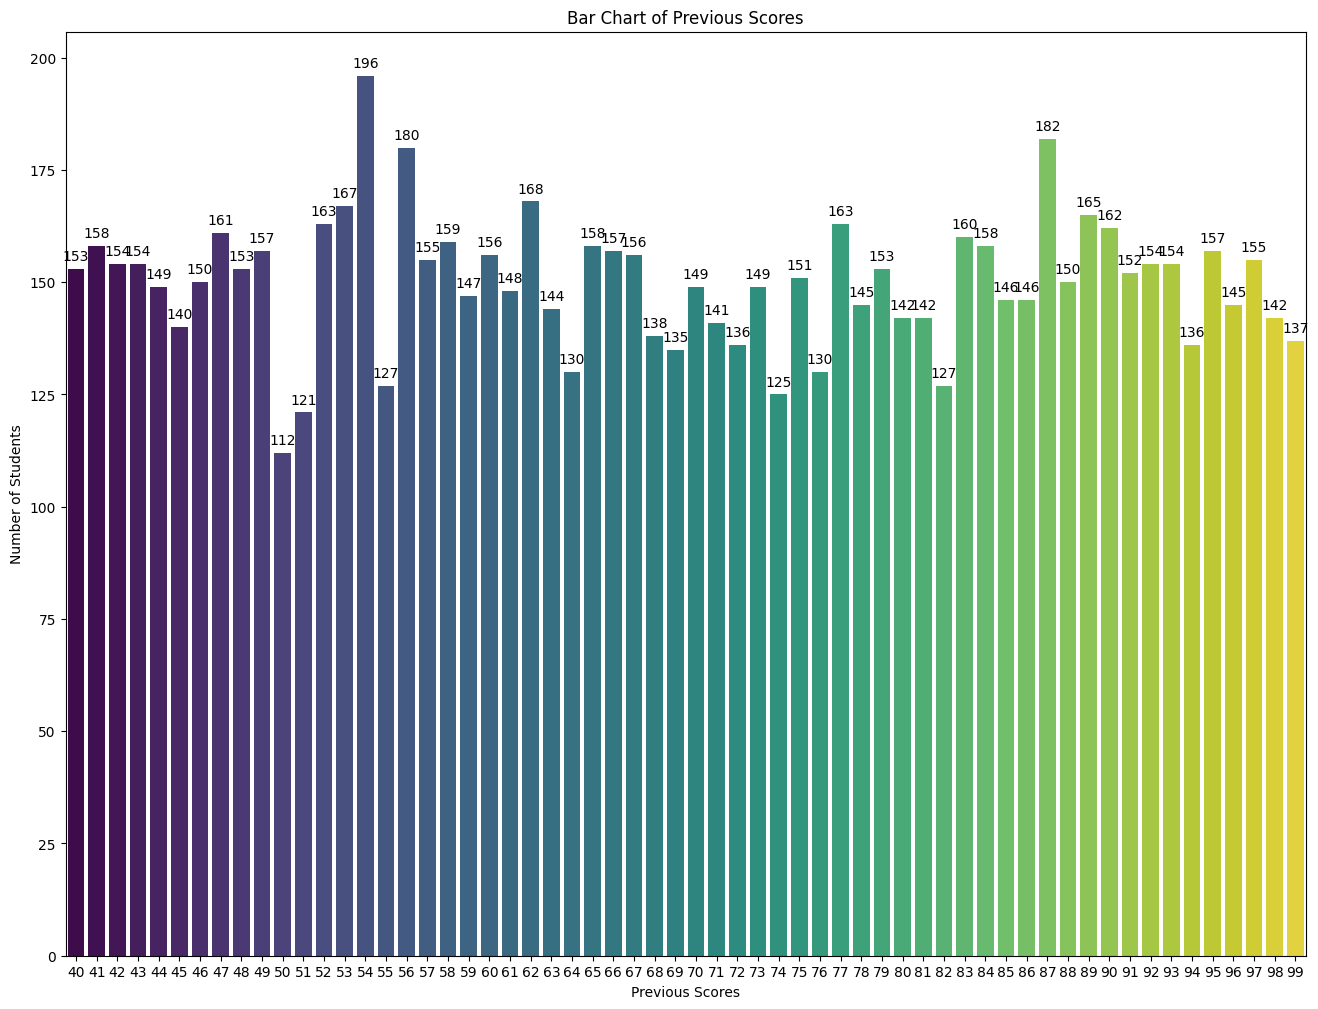

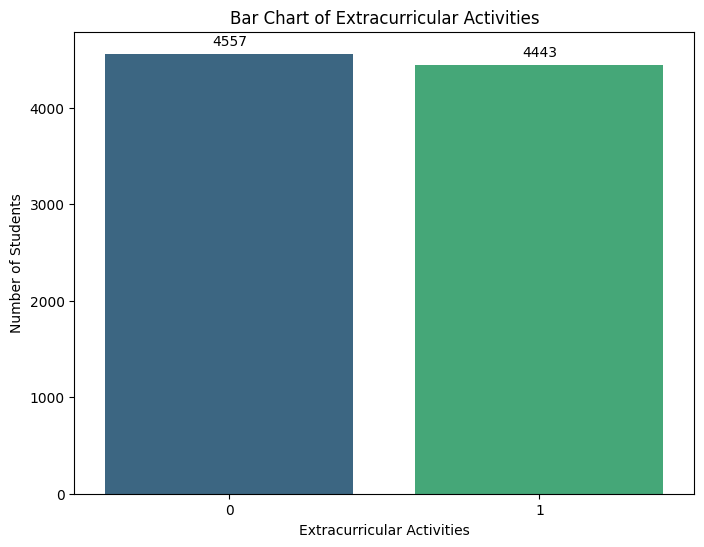

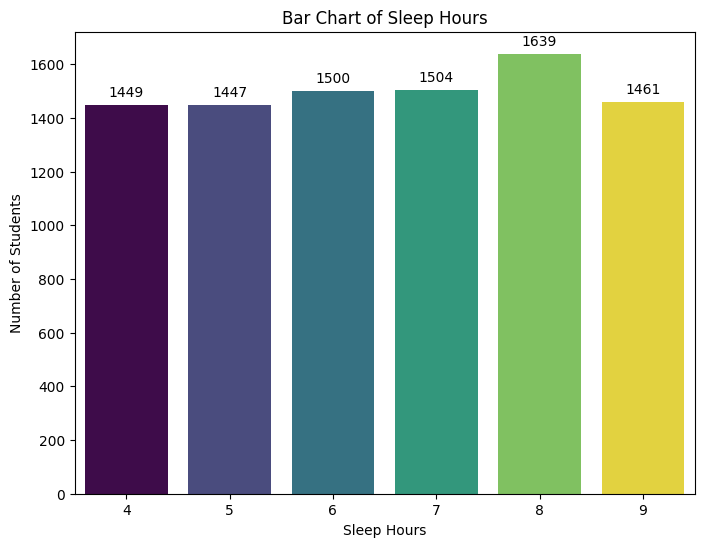

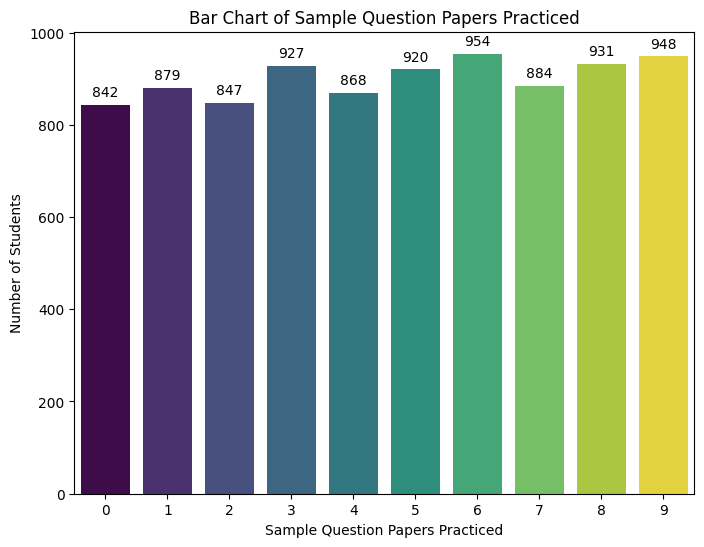

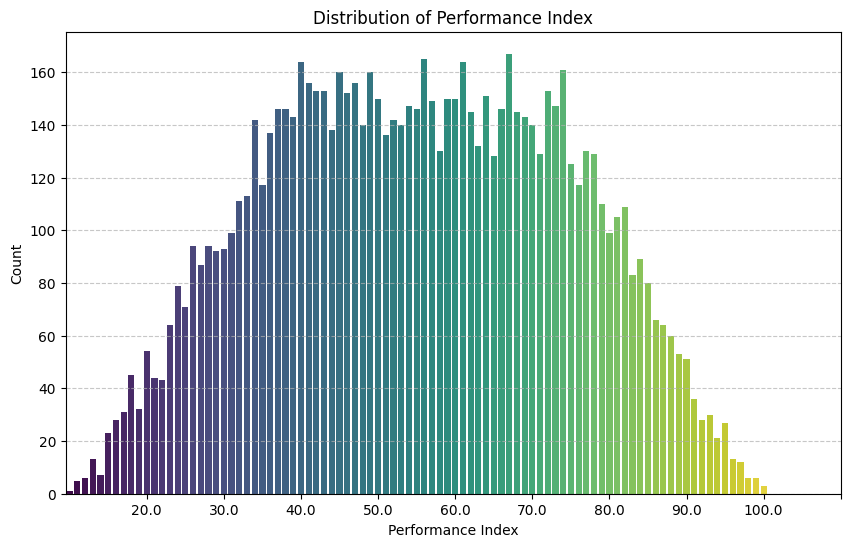

In [17]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
# Set display format for floating-point numbers in Pandas DataFrames
pd.options.display.float_format = '{:.3f}'.format
# Display a statistical summary of the training data
print(train.describe().to_string())

# Calculate the correlation matrix for the features in the training dataset
correlation_matrix = train.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-0.05, vmax=0.05, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Loop through each column in the training data to plot individual feature charts
for column in train.columns:
    if column == "Performance Index":
        plt.figure(figsize=(10, 6))
        # Use bar plot to show the distribution of 'Performance Index' values
        performance_counts = train['Performance Index'].value_counts().sort_index()
        sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='viridis', hue=performance_counts.index, dodge=False, legend=False)

        plt.title('Distribution of Performance Index')
        plt.xlabel('Performance Index')
        plt.ylabel('Count')
        plt.xticks(range(10, 110, 10))  # Set x-ticks to represent specific bins
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        # Adjust the plot size for 'Previous Scores' due to potentially larger data
        if column == "Previous Scores":
            plt.figure(figsize=(16, 12))
        else:
            plt.figure(figsize=(8, 6))  # Default plot size for other columns

        # Create a bar plot for the current column
        ax = sns.barplot(x=train[column].value_counts().index,
                         y=train[column].value_counts().values,
                         palette='viridis',
                         hue=train[column].value_counts().index,
                         dodge=False, legend=False)

        # Annotate each bar with its value
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),  # Offset text from the bar
                        textcoords='offset points')

        plt.title(f'Bar Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Number of Students')
        plt.show()


# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [18]:
# Phần code cho yêu cầu 2a
theta = linear_regression(X_train, y_train)

print_linear_regression_equation(theta, train.columns[:-1], train.columns[-1])

Linear Regression equation:  Performance Index = -33.969 + 2.852 * Hours Studied + 1.018 * Previous Scores + 0.604 * Extracurricular Activities + 0.474 * Sleep Hours + 0.192 * Sample Question Papers Practiced


In [19]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
mae = mean_absolute_error(X_test, y_test, theta)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.5956486884762981


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = −33.969 + 2.852 * Hours Studied + 1.018 * Previous Scores + 0.604 * Extracurricular Activities + 0.474 * Sleep Hours + 0.192 * Sample Question Papers Practiced$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [20]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu
mean_maes = []

for var in range(X_train.shape[1]):
    X_train_var = X_train.values[:, [var]]
    mae_var = k_fold_cross_validation(X_train_var, y_train)
    mean_maes.append(mae_var)
var_names = train.columns[:-1]
# Create a list of tuples for each feature with its corresponding MAE
results = [(i + 1, var_names[i], mean_maes[i]) for i in range(len(var_names))]

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=["STT", "Mô hình với 1 đặc trưng", "MAE"])

# Use tabulate to print the DataFrame
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))
best_var_index = mean_maes.index(min(mean_maes))
print(f"Feature with the smallest MAE: {train.columns[:-1][best_var_index]}")
    

╒═══════╤══════════════════════════════════╤══════════╕
│   STT │ Mô hình với 1 đặc trưng          │      MAE │
╞═══════╪══════════════════════════════════╪══════════╡
│     1 │ Hours Studied                    │ 15.4554  │
├───────┼──────────────────────────────────┼──────────┤
│     2 │ Previous Scores                  │  6.62122 │
├───────┼──────────────────────────────────┼──────────┤
│     3 │ Extracurricular Activities       │ 16.195   │
├───────┼──────────────────────────────────┼──────────┤
│     4 │ Sleep Hours                      │ 16.1889  │
├───────┼──────────────────────────────────┼──────────┤
│     5 │ Sample Question Papers Practiced │ 16.1864  │
╘═══════╧══════════════════════════════════╧══════════╛
Feature with the smallest MAE: Previous Scores


In [21]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_best = X_train.values[:, [best_var_index]]

theta_best = linear_regression(X_train_best, y_train)

print_linear_regression_equation(theta_best, [train.columns[:-1][best_var_index]], train.columns[-1])

Linear Regression equation:  Performance Index = -14.989 + 1.011 * Previous Scores


In [22]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_mode
print(f"MAE with best_feature_model: {mean_absolute_error(X_test.values[:, [best_var_index]], y_test, theta_best)}")

MAE with best_feature_model: 6.5442772934525015


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -14.989 + 1.011 * \text{Previous Scores}$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [23]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
# model 1: data standardization
X_train_model1 = X_train.copy()

X_train_model1['Previous Scores'] = X_train_model1['Previous Scores'] / 100 * 20

X_train_model1['Hours Studied'] = X_train_model1['Hours Studied'] / 9 * 20

X_train_model1['Extracurricular Activities'] = X_train_model1['Extracurricular Activities'] / 1 * 20
        
X_train_model1['Sleep Hours'] = X_train_model1['Sleep Hours'] / 9 * 20
        
X_train_model1['Sample Question Papers Practiced'] = X_train_model1['Sample Question Papers Practiced'] / 9 * 20
feature_names = ["(Hours Studied * 20 / 9)", "(Previous Scores * 20 / 100)", "(Extracurricular Activities * 1 / 9)", "(Sleep Hours * 20 / 9)", "(Sample Question Papers Practiced * 20 / 9)"]
theta_model_1 = linear_regression(X_train_model1, y_train)
print("Model 1 ", end="")
print_linear_regression_equation(theta_model_1, feature_names, train.columns[-1])
# model 2: separate important Data
X_train_model2 = X_train[['Hours Studied', 'Previous Scores']].copy()

theta_model_2 = linear_regression(X_train_model2, y_train)
print("Model 2 ", end="")
print_linear_regression_equation(theta_model_2, ['Hours Studied', 'Previous Scores'], train.columns[-1])
# model 3: Polynomial Features
X_train_model3 = X_train.copy()

X_train_model3['Previous Scores'] = X_train_model3['Previous Scores'] ** 2

X_train_model3['Hours Studied'] = X_train_model3['Hours Studied'] ** 2

X_train_model3['Extracurricular Activities'] = X_train_model3['Extracurricular Activities'] ** 2
        
X_train_model3['Sleep Hours'] = X_train_model3['Sleep Hours'] ** 2
        
X_train_model3['Sample Question Papers Practiced'] = X_train_model3['Sample Question Papers Practiced'] ** 2

theta_model_3 = linear_regression(X_train_model3, y_train)
feature_names = [name + " ^ 2" for name in train.columns[:-1]]
print("Model 3 ", end="")
print_linear_regression_equation(theta_model_3, feature_names, train.columns[-1])

Model 1 Linear Regression equation:  Performance Index = -33.969 + 1.283 * (Hours Studied * 20 / 9) + 5.089 * (Previous Scores * 20 / 100) + 0.030 * (Extracurricular Activities * 1 / 9) + 0.213 * (Sleep Hours * 20 / 9) + 0.087 * (Sample Question Papers Practiced * 20 / 9)
Model 2 Linear Regression equation:  Performance Index = -29.747 + 2.856 * Hours Studied + 1.018 * Previous Scores
Model 3 Linear Regression equation:  Performance Index = 7.051 + 0.272 * Hours Studied ^ 2 + 0.007 * Previous Scores ^ 2 + 0.654 * Extracurricular Activities ^ 2 + 0.034 * Sleep Hours ^ 2 + 0.019 * Sample Question Papers Practiced ^ 2


## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [24]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu
mean_maes = []
mean_maes.append(k_fold_cross_validation(X_train_model1, y_train))
mean_maes.append(k_fold_cross_validation(X_train_model2, y_train))
mean_maes.append(k_fold_cross_validation(X_train_model3, y_train))
model_names = ["Model 1", "Model 2", "Model 3"]
# Create a list of tuples for each feature with its corresponding MAE
results = [(i + 1, model_names[i], mean_maes[i]) for i in range(len(model_names))]

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=["STT", "Mô hình", "MAE"])

# Use tabulate to print the DataFrame
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))
best_model_index = mean_maes.index(min(mean_maes))
print(f"Model with smallest MAE: model {best_model_index + 1}")

╒═══════╤═══════════╤═════════╕
│   STT │ Mô hình   │     MAE │
╞═══════╪═══════════╪═════════╡
│     1 │ Model 1   │ 1.62141 │
├───────┼───────────┼─────────┤
│     2 │ Model 2   │ 1.81609 │
├───────┼───────────┼─────────┤
│     3 │ Model 3   │ 2.64742 │
╘═══════╧═══════════╧═════════╛
Model with smallest MAE: model 1


In [25]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
feature_names = ["(Hours Studied * 20 / 9)", "(Previous Scores * 20 / 100)", "(Extracurricular Activities * 1 / 9)", "(Sleep Hours * 20 / 9)", "(Sample Question Papers Practiced * 20 / 9)"]
theta_model_1 = linear_regression(X_train_model1, y_train)
print("Model 1 ", end="")
print_linear_regression_equation(theta_model_1, feature_names, train.columns[-1])

Model 1 Linear Regression equation:  Performance Index = -33.969 + 1.283 * (Hours Studied * 20 / 9) + 5.089 * (Previous Scores * 20 / 100) + 0.030 * (Extracurricular Activities * 1 / 9) + 0.213 * (Sleep Hours * 20 / 9) + 0.087 * (Sample Question Papers Practiced * 20 / 9)


In [26]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
X_test_model1 = X_test.copy()

X_test_model1['Previous Scores'] = X_test_model1['Previous Scores'] / 100 * 20

X_test_model1['Hours Studied'] = X_test_model1['Hours Studied'] / 9 * 20

X_test_model1['Extracurricular Activities'] = X_test_model1['Extracurricular Activities'] / 1 * 20
        
X_test_model1['Sleep Hours'] = X_test_model1['Sleep Hours'] / 9 * 20
        
X_test_model1['Sample Question Papers Practiced'] = X_test_model1['Sample Question Papers Practiced'] / 9 * 20
print(f"MAE of best_model: {mean_absolute_error(X_test_model1, y_test, theta_model_1)}")

MAE of best_model: 1.5956486884763035


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -33.969 + 1.283 * (Hours Studied * 20 / 9) + 5.089 * (Previous Scores * 20 / 100) + 0.030 * (Extracurricular Activities * 1 / 9) + 0.213 * (Sleep Hours * 20 / 9) + 0.087 * (Sample Question Papers Practiced * 20 / 9)$$